In [1]:
import __future__
import numpy as np
import json
import matplotlib.pyplot as plt
from  astropy.table import Table, vstack, hstack
import pandas as pd
from matplotlib.colors import PowerNorm
import seaborn as sns
from scipy.optimize import fsolve
from pathlib import Path
ROOT_PATH = Path("data")

In [2]:
#Find the point inteception between two lines     
def findIntersection(m, y, m1, y1, x0):
    x = np.linspace(-10.0, 15.5, 200)
    return fsolve(lambda x : (m*x + y) - (m1*x + y1), x0)

In [3]:
# Planetary nebula
tab_pn = Table.read("../Chornay-PNe/Chornay-PNe-GAIA-PS1-saturated.ecsv", format="ascii.ecsv")
tab_star = Table.read("../Star-PS-Gaia.ecsv", format="ascii.ecsv")
tab_star2 = Table.read("../Star2-PS-Gaia.ecsv", format="ascii.ecsv")

catalogs = {'SySt': {'file': '../SySt-PS-GaiaEDR3.ecsv',
                     'G': 'phot_g_mean_mag',
                     'BP-RP': 'bp_rp',
                     'r': 'rmag',
                      'g': 'gmag'},
            'CV': {'file': '../CV-PS-GaiaEDR3.ecsv',
                    'G': 'phot_g_mean_mag',
                   'BP-RP': 'bp_rp',
                   'r': 'rmag',
                    'g': 'gmag'},
            'SNR': {'file': '../SNR-PS-GaiaEDR3.ecsv',
                    'G': 'phot_g_mean_mag',
                    'BP-RP': 'bp_rp',
                    'r': 'rmag',
                    'g': 'gmag'},
            'YSO': {'file': '../YSO-PS-GaiaEDR3.ecsv',
                    'G': 'phot_g_mean_mag',
                    'BP-RP': 'bp_rp',
                    'r': 'rmag',
                    'g': 'gmag'},
            'AeBe': {'file': '../AeBe-PS-GaiaEDR3.ecsv',
                     'G': 'phot_g_mean_mag',
                     'BP-RP': 'bp_rp',
                     'r': 'rmag',
                     'g': 'gmag'}
            }

In [4]:
tab_pn

recno,PNG,Name,GaiaEDR3,RA_ICRS,DE_ICRS,Rel,Sep,BP-RP,Gmag,plx,e_plx,RUWE,pnRAdeg,pnDEdeg,pnRad,pnStat,rcomb,b_rcomb,B_rcomb,SimbadName,_RA_icrs,_DE_icrs,DR3Name,RAdeg,DEdeg,errHalfMaj,errHalfMin,errPosAng,SolID,Source,RandomI,e_RAdeg,e_DEdeg,Plx_x,e_Plx_x,RPlx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RADEcor,RAPlxcor,RApmRAcor,RApmDEcor,DEPlxcor,DEpmRAcor,DEpmDEcor,PlxpmRAcor,PlxpmDEcor,pmRApmDEcor,NAL,NAC,NgAL,NbAL,gofAL,chi2AL,epsi,sepsi,Solved,APF,nueff,pscol,e_pscol,RApscolCorr,DEpscolCorr,PlxpscolCorr,pmRApscolCorr,pmDEpscolCorr,MatchObsA,Nper,amax,MatchObs,IPDgofha,IPDgofhp,IPDfmp,IPDfow,RUWE_x,Dup,o_Gmag,FG,e_FG,RFG,Gmag_x,e_Gmag,o_BPmag,FBP,e_FBP,RFBP,BPmag,e_BPmag,o_RPmag,FRP,e_FRP,RFRP,RPmag,e_RPmag,E(BP/RP),NBPcont,NBPblend,NRPcont,NRPblend,Mode,BP-RP_x,BP-G,G-RP,RV,e_RV,n_RV,o_RV,o_RVd,RVNper,RVS/N,RVgof,RVchi2,RVTdur,RVamp,RVtempTeff,RVtemplogg,RVtemp[Fe/H],Vatmparam,vbroad,e_Vbroad,o_Vbroad,GRVSmag,e_GRVSmag,o_GRVSmag,RVSS/N,VarFlag,PQSO,PGal,PSS,Teff,b_Teff_x,B_Teff_xa,logg,b_logg_x,B_logg_xa,[Fe/H],b_[Fe/H]_x,B_[Fe/H]_xa,Dist,b_Dist_x,B_Dist_xa,A0,b_A0_x,B_A0_xa,AG,b_AG_x,B_AG_xa,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist,objID,RAJ2000_x,DEJ2000_x,errHalfMaj_x,errHalfMin_x,errPosAng_x,f_objID,Qual,Epoch,Ns,Nd,gmag_xa,e_gmag_x,gKmag,e_gKmag,gFlags,rmag,e_rmag,rKmag,e_rKmag,rFlags,imag,e_imag,iKmag,e_iKmag,iFlags,zmag,e_zmag,zKmag,e_zKmag,zFlags,ymag,e_ymag,yKmag,e_yKmag,yFlags,angDist_x
int64,str11,str31,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,float64,str31,float64,float64,str28,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,bool,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,int64,int64,float64,int64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str7,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,int64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64
304,007.1+07.4,PTB 7,4121634308764755328,263.62634519548,-19.01694567812,0.998285668806825,0.0556112142390261,0.782631,19.838333,1.3918,1.55045390129089,2.25277972221375,263.62633,-19.01694,14.0,T,--,--,--,PN G007.1+07.4,263.62634519548,-19.01694567812,Gaia DR3 4121634308764755328,263.62634519548,-19.01694567812,0.001,0.001,62.0,1636148068921376768,4121634308764755328,1784812112,1.0838,0.8104,1.3918,1.5505,0.8977,17.373,-16.897,1.283,4.039,0.797,0.4466,-0.3816,0.1529,-0.2107,-0.5582,-0.0363,-0.7961,-0.3432,0.4928,0.3271,407,0,401,6,30.3154,2174.6,6.119,59.008,95,False,--,1.8872,0.1703,0.013,0.215,-0.245,-0.057,-0.409,46,15,1.870305,47,0.1296,137.7,10,2,2.253,1,405,217.81898,1.98949,109.485,19.842127,0.010292,43,203.067,5.99767,33.8576,19.569445,0.032189,39,242.344,5.92372,40.9108,18.786814,0.026807,2.045,0.0,43.0,0.0,39.0,0.0,0.782631,-0.272682,1.055313,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,NOT_AVAILABLE,0.067833,0.01149,0.920677,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-

In [5]:
mask = tab_pn["pnStat"] == "T"
tab_pn_true = tab_pn[mask]

In [6]:
tab_pn_true

recno,PNG,Name,GaiaEDR3,RA_ICRS,DE_ICRS,Rel,Sep,BP-RP,Gmag,plx,e_plx,RUWE,pnRAdeg,pnDEdeg,pnRad,pnStat,rcomb,b_rcomb,B_rcomb,SimbadName,_RA_icrs,_DE_icrs,DR3Name,RAdeg,DEdeg,errHalfMaj,errHalfMin,errPosAng,SolID,Source,RandomI,e_RAdeg,e_DEdeg,Plx_x,e_Plx_x,RPlx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RADEcor,RAPlxcor,RApmRAcor,RApmDEcor,DEPlxcor,DEpmRAcor,DEpmDEcor,PlxpmRAcor,PlxpmDEcor,pmRApmDEcor,NAL,NAC,NgAL,NbAL,gofAL,chi2AL,epsi,sepsi,Solved,APF,nueff,pscol,e_pscol,RApscolCorr,DEpscolCorr,PlxpscolCorr,pmRApscolCorr,pmDEpscolCorr,MatchObsA,Nper,amax,MatchObs,IPDgofha,IPDgofhp,IPDfmp,IPDfow,RUWE_x,Dup,o_Gmag,FG,e_FG,RFG,Gmag_x,e_Gmag,o_BPmag,FBP,e_FBP,RFBP,BPmag,e_BPmag,o_RPmag,FRP,e_FRP,RFRP,RPmag,e_RPmag,E(BP/RP),NBPcont,NBPblend,NRPcont,NRPblend,Mode,BP-RP_x,BP-G,G-RP,RV,e_RV,n_RV,o_RV,o_RVd,RVNper,RVS/N,RVgof,RVchi2,RVTdur,RVamp,RVtempTeff,RVtemplogg,RVtemp[Fe/H],Vatmparam,vbroad,e_Vbroad,o_Vbroad,GRVSmag,e_GRVSmag,o_GRVSmag,RVSS/N,VarFlag,PQSO,PGal,PSS,Teff,b_Teff_x,B_Teff_xa,logg,b_logg_x,B_logg_xa,[Fe/H],b_[Fe/H]_x,B_[Fe/H]_xa,Dist,b_Dist_x,B_Dist_xa,A0,b_A0_x,B_A0_xa,AG,b_AG_x,B_AG_xa,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist,objID,RAJ2000_x,DEJ2000_x,errHalfMaj_x,errHalfMin_x,errPosAng_x,f_objID,Qual,Epoch,Ns,Nd,gmag_xa,e_gmag_x,gKmag,e_gKmag,gFlags,rmag,e_rmag,rKmag,e_rKmag,rFlags,imag,e_imag,iKmag,e_iKmag,iFlags,zmag,e_zmag,zKmag,e_zKmag,zFlags,ymag,e_ymag,yKmag,e_yKmag,yFlags,angDist_x
int64,str11,str31,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,float64,str31,float64,float64,str28,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,bool,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,int64,int64,float64,int64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str7,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,int64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64
304,007.1+07.4,PTB 7,4121634308764755328,263.62634519548,-19.01694567812,0.998285668806825,0.0556112142390261,0.782631,19.838333,1.3918,1.55045390129089,2.25277972221375,263.62633,-19.01694,14.0,T,--,--,--,PN G007.1+07.4,263.62634519548,-19.01694567812,Gaia DR3 4121634308764755328,263.62634519548,-19.01694567812,0.001,0.001,62.0,1636148068921376768,4121634308764755328,1784812112,1.0838,0.8104,1.3918,1.5505,0.8977,17.373,-16.897,1.283,4.039,0.797,0.4466,-0.3816,0.1529,-0.2107,-0.5582,-0.0363,-0.7961,-0.3432,0.4928,0.3271,407,0,401,6,30.3154,2174.6,6.119,59.008,95,False,--,1.8872,0.1703,0.013,0.215,-0.245,-0.057,-0.409,46,15,1.870305,47,0.1296,137.7,10,2,2.253,1,405,217.81898,1.98949,109.485,19.842127,0.010292,43,203.067,5.99767,33.8576,19.569445,0.032189,39,242.344,5.92372,40.9108,18.786814,0.026807,2.045,0.0,43.0,0.0,39.0,0.0,0.782631,-0.272682,1.055313,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,NOT_AVAILABLE,0.067833,0.01149,0.920677,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-

In [7]:
# Column of stars
print(tab_star.columns)
print(tab_star2.columns)

<TableColumns names=('recno_1','Name_1','Vmag_1','SpType_1','n_Name_1','Teff_1','e_Teff_1','E_Teff_1','logg_1','e_logg_1','E_logg_1','[M/H]_1','e_[M/H]_1','E_[M/H]_1','SMR_1','_RA_1','_DE_1','objID','RAJ2000_1','DEJ2000_1','errHalfMaj_1','errHalfMin_1','errPosAng_1','f_objID','Qual','Epoch','Ns','Nd','gmag','e_gmag','gKmag','e_gKmag','gFlags','rmag','e_rmag','rKmag','e_rKmag','rFlags','imag','e_imag','iKmag','e_iKmag','iFlags','zmag','e_zmag','zKmag','e_zKmag','zFlags','ymag','e_ymag','yKmag','e_yKmag','yFlags','angDist_1','recno_2','Name_2','Vmag_2','SpType_2','n_Name_2','Teff_2','e_Teff_2','E_Teff_2','logg_2','e_logg_2','E_logg_2','[M/H]_2','e_[M/H]_2','E_[M/H]_2','SMR_2','_RA_2','_DE_2','DR3Name','RAdeg','DEdeg','errHalfMaj_2','errHalfMin_2','errPosAng_2','SolID','Source','RandomI','e_RAdeg','e_DEdeg','Plx','e_Plx','RPlx','PM','pmRA','e_pmRA','pmDE','e_pmDE','RADEcor','RAPlxcor','RApmRAcor','RApmDEcor','DEPlxcor','DEpmRAcor','DEpmDEcor','PlxpmRAcor','PlxpmDEcor','pmRApmDEcor','NAL',

In [8]:
G_r_, G_g_, bp_rp_ = [], [], []
for cat, metadata in catalogs.items():
    table = Table.read(metadata["file"], format="ascii.ecsv")
    #table_final = vstack([table])
    # color gaia and ps
    G_r = table[metadata["G"]] - table[metadata["r"]]
    G_g = table[metadata["G"]] - table[metadata["g"]]
    bp_rp = table[metadata["BP-RP"]]
    for i, ii, iii in zip(G_r, G_g, bp_rp):
        if (np.isfinite(i) and np.isfinite(ii)):
            G_r_.append(i)
            G_g_.append(ii)
            bp_rp_.append(iii)

In [9]:
#plt.plot(G_g_, bp_rp_, "o")

In [10]:
# PN and stars
G_r_pn = tab_pn_true['Gmag_x'] - tab_pn_true['rmag']
G_g_pn = tab_pn_true['Gmag_x'] - tab_pn_true["gmag_xa"]
bp_rp_pn = tab_pn_true['BP-RP_x']

G_r_star = tab_star['Gmag'] - tab_star['rmag']
G_g_star = tab_star['Gmag'] - tab_star['gmag']
bp_rp_star = tab_star['BP-RP']

G_r_star2 = tab_star2['Gmag_1'] - tab_star2['rmag_x']
G_g_star2 = tab_star2['Gmag_1'] - tab_star2['gmag_x']
bp_rp_star2 = tab_star2['BPmag_1'] -  tab_star2['RPmag_1']

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/tmp/ipykernel_17579/4174009785.py:65: UserWarning: Warning: converting a masked element to nan.
  bp_rp_numeric = [float(value) for value in bp_rp_]
/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


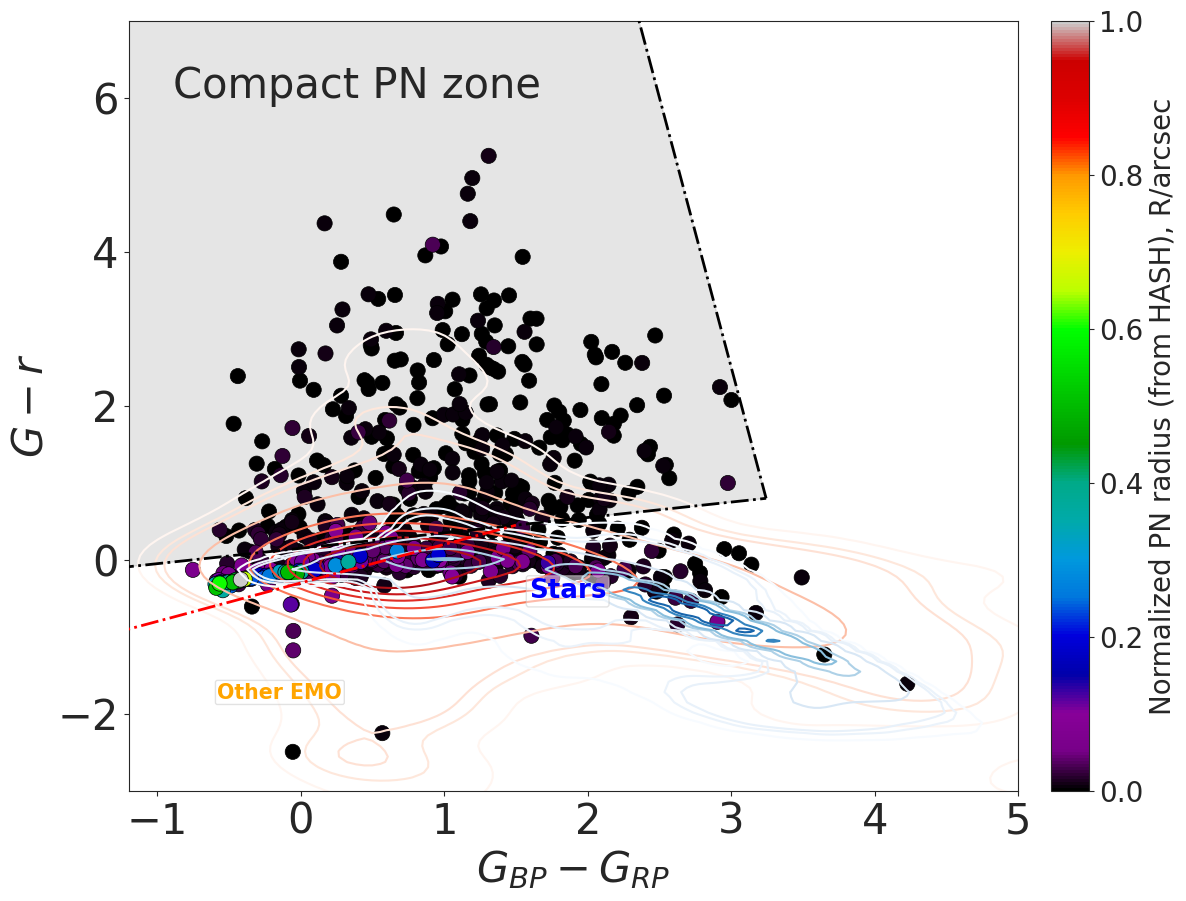

In [11]:
#Plotting
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.colors import LogNorm

lgd_kws = {'frameon': True, 'fancybox': True, 'shadow': True}
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(14, 10))
plt.tick_params(axis='x', labelsize=30) 
plt.tick_params(axis='y', labelsize=30)
#fig = plt.figure(figsize=(10, 8))
#ax = fig.add_subplot(111)
# Scatter plot

# Assuming tab_pn_true is your DataFrame
# Normalize the values for the colorbar to [0, 1]
norm = Normalize(vmin=min(tab_pn_true["pnRad"]), vmax=max(tab_pn_true["pnRad"]))

# Normalize the data for the scatter plot
normalized_pnRad = norm(tab_pn_true["pnRad"])

# Sort the data based on the normalized values
sorted_indices = np.argsort(normalized_pnRad)
bp_rp_pn_sorted = bp_rp_pn[sorted_indices]
G_r_pn_sorted = G_r_pn[sorted_indices]
normalized_pnRad_sorted = normalized_pnRad[sorted_indices]

# Create the scatter plot with 'plasma' colormap
scatter = plt.scatter(
    bp_rp_pn_sorted,
    G_r_pn_sorted,
    s=120,
    c=normalized_pnRad_sorted,
    cmap='nipy_spectral',  # Use 'plasma' colormap
    edgecolors="k",
    zorder=2,
    lw=0.5,
    alpha=1,
)

# KDE plot
#ax.scatter(bp_rp_pn, G_r_pn, s=80, c = sns.xkcd_palette(["forest green"]), edgecolors= "g", zorder = 1, lw=0.5, alpha = 0.7, label = "PN")
#ax.scatter(bp_rp_star, G_r_star, s=50, c = sns.xkcd_palette(["forest green"]), edgecolors= "k", zorder = 11, alpha = 0.6, label = "Stars")

# sns.kdeplot(
#     bp_rp_star, G_r_star,
#     ax=ax,
#     bw_method='scott',
#     levels=[0.05, 0.08, 0.1, 0.2, 0.4, 0.5, 0.7, 0.8, 1],
#     norm=PowerNorm(0.5),
#     cmap="Blues",
#     zorder = 3
# )

sns.kdeplot(
    bp_rp_star2, G_r_star2,
    ax=ax,
    bw_method= 'scott',
    levels=[0.05, 0.08, 0.1, 0.2, 0.4, 0.5, 0.7, 0.8, 1],
    norm=PowerNorm(0.5),
    cmap="Blues",
    zorder = 4, 
)
# Assuming bp_rp_ is a list of strings
bp_rp_numeric = [float(value) for value in bp_rp_]

sns.kdeplot(
    bp_rp_numeric, G_r_,
    ax=ax,
    bw_method='scott',
    levels=[0.05, 0.08, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
    norm=PowerNorm(0.5),
    cmap="Reds", zorder = 2,
     )


#ax.scatter(bp_rp_, G_r_, s=50, c = sns.xkcd_palette(["purple"]), edgecolors= "k", zorder = 10, alpha = 0.6, label = "Other EM")
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=30)
plt.ylabel(r'$G - r$', fontsize=30)
ax.set_xlim(-1.2, 5)
ax.set_ylim(-3, 7)

# Region where are located the PNe
result = findIntersection(0.2, 0.15, -7, 23.5, 0.0)
result1 = findIntersection(0.2, 0.15, 0.5, -0.3, 0.0)

x_new = np.linspace(-15.5, result,  200)
x_new1 = np.linspace(-15.5, result1,  200)
y = 0.2*x_new + 0.15
yy = -7*x_new + 23.5
yyy = 0.5*x_new1 - 0.3
#Mask
#mask = y >= result_y - 0.5
ax.plot(x_new, y, color='k', linestyle='-.', lw=2, zorder=30)
ax.plot(x_new, yy , color='k', linestyle='-.', lw=2, zorder=30)
ax.plot(x_new1, yyy , color='r', linestyle='-.', lw=2, zorder=30)

#reshape
x_new = x_new.ravel()
y = y.ravel()
yy = yy.ravel()
plt.fill_between(x_new, y, yy, color="k", alpha=0.1)

# Some texts
ax.text(0.05, 0.9, "Compact PN zone", fontsize=30,
        bbox=dict(facecolor='gray', alpha=0.0),
        transform=ax.transAxes)

bbox_props = dict(boxstyle="round", fc="w", ec="0.78", alpha=0.5, pad=0.1)
plt.text(0.45, 0.25, 'Stars',
         transform=ax.transAxes, c="b", weight='bold', fontsize=18.8, zorder=10, bbox=bbox_props)

plt.text(0.1, 0.12, 'Other EMO',
         transform=ax.transAxes, c="orange", weight='bold', fontsize=14.8, bbox=bbox_props)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.03, format='%.1f')
cbar.set_label('Normalized PN radius (from HASH), R/arcsec', fontsize=20)  # Label for the colorbar
# Set the font size of colorbar labels
cbar.ax.tick_params(labelsize=20)  # Adjust the font size as needed

plt.savefig("../Figs/color-diagram-ps-gaiaEDR3-PN-Chornay-r.pdf")
#ax.legend(prop={'family': 'monospace', 'size': 30}, **lgd_kws)

## Usig the g-band

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


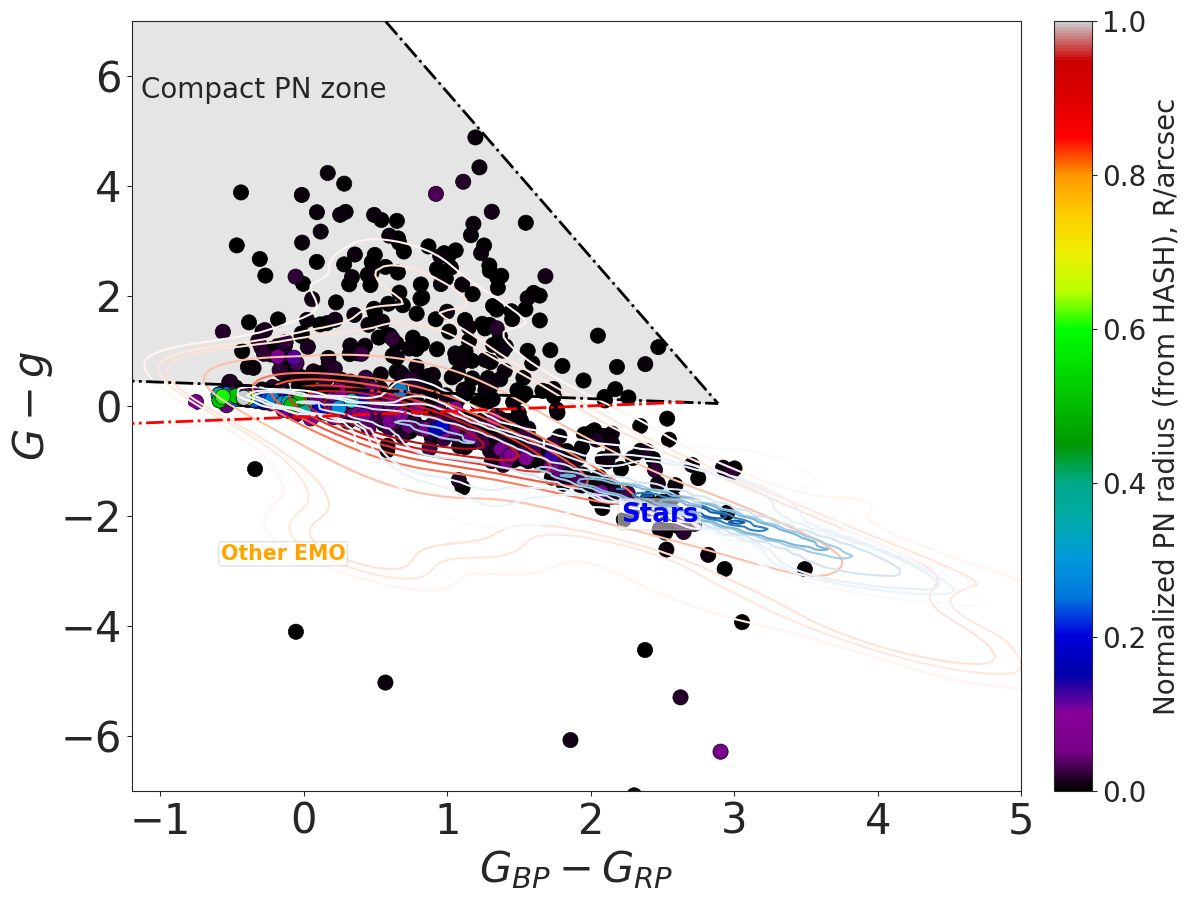

In [12]:
#Plotting
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.colors import LogNorm

lgd_kws = {'frameon': True, 'fancybox': True, 'shadow': True}
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(14, 10))
plt.tick_params(axis='x', labelsize=30) 
plt.tick_params(axis='y', labelsize=30)
#fig = plt.figure(figsize=(10, 8))
#ax = fig.add_subplot(111)
# Scatter plot

# Assuming tab_pn_true is your DataFrame
# Sort the data based on the normalized values
G_g_pn_sorted = G_g_pn[sorted_indices]

# Create the scatter plot with 'plasma' colormap
scatter = plt.scatter(
    bp_rp_pn_sorted,
    G_g_pn_sorted,
    s=120,
    c=normalized_pnRad_sorted,
    cmap='nipy_spectral',  # Use 'plasma' colormap
    edgecolors="k",
    zorder=2,
    lw=0.5,
    alpha=1,
)

sns.kdeplot(
    bp_rp_star2, G_g_star2,
    ax=ax,
    bw_method= 'scott',
    levels=[0.05, 0.08, 0.1, 0.2, 0.4, 0.5, 0.7, 0.8, 1],
    norm=PowerNorm(0.5),
    cmap="Blues",
    zorder = 4, 
)

sns.kdeplot(
    bp_rp_numeric, G_g_,
    ax=ax,
    bw_method='scott',
    levels=[0.05, 0.08, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
    norm=PowerNorm(0.5),
    cmap="Reds", zorder = 2,
     )

#ax.scatter(bp_rp_, G_r_, s=50, c = sns.xkcd_palette(["purple"]), edgecolors= "k", zorder = 10, alpha = 0.6, label = "Other EM")
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=30)
plt.ylabel(r'$G - g$', fontsize=30)
ax.set_xlim(-1.2, 5)
ax.set_ylim(-7, 7)

# Region where are located the PNe
result = findIntersection(-0.1, 0.33, -3, 8.7, 0.0)
result1 = findIntersection(-0.1, 0.33, 0.1, -0.2, 0.0)

x_new = np.linspace(-15.5, result,  200)
x_new1 = np.linspace(-15.5, result1,  200)
y = -0.1*x_new + 0.33
yy = -3.*x_new + 8.7
yyy = 0.1*x_new1 - 0.2
#Mask
#mask = y >= result_y - 0.5
ax.plot(x_new, y, color='k', linestyle='-.', lw=2, zorder=30)
ax.plot(x_new, yy , color='k', linestyle='-.', lw=2, zorder=30)
ax.plot(x_new1, yyy , color='r', linestyle='-.', lw=2, zorder=30)

#reshape
x_new = x_new.ravel()
y = y.ravel()
yy = yy.ravel()
plt.fill_between(x_new, y, yy, color="k", alpha=0.1)

# Some texts
ax.text(0.01, 0.9, "Compact PN zone", fontsize=20,
        bbox=dict(facecolor='gray', alpha=0.0),
        transform=ax.transAxes)

bbox_props = dict(boxstyle="round", fc="w", ec="0.78", alpha=0.5, pad=0.1)
plt.text(0.55, 0.35, 'Stars',
         transform=ax.transAxes, c="b", weight='bold', fontsize=18.8, zorder=10, bbox=bbox_props)

plt.text(0.1, 0.3, 'Other EMO',
         transform=ax.transAxes, c="orange", weight='bold', fontsize=14.8, bbox=bbox_props)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.03, format='%.1f')
cbar.set_label('Normalized PN radius (from HASH), R/arcsec', fontsize=20)  # Label for the colorbar
# Set the font size of colorbar labels
cbar.ax.tick_params(labelsize=20)  # Adjust the font size as needed

plt.savefig("../Figs/color-diagram-ps-gaiaEDR3-PN-Chornay-g.pdf")
#ax.legend(prop={'family': 'monospace', 'size': 30}, **lgd_kws)